In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'../data/final_data.csv')

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [18]:
X = data.iloc[:, 1:]
y = data['TARGET']
y = y.replace(1,-1)
y = y.replace(0,1)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 2022)
cv = StratifiedKFold(n_splits = 3)

In [19]:
def one_class_classification(model_name, train_x, train_y, cv):

    if model_name == 'iforest':
        model = IsolationForest()
        param_space = {'contamination': [0.1, 0.3, 0.5],
                       'n_estimators': [50, 75, 100],
                       'max_features': [0.3, 0.5, 0.8, 1]}

    elif model_name == 'one_svm':
        model = OneClassSVM(max_iter= 300)
        param_space = {'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
                       'gamma': [0.3, 0.5, 0.7, 0.9]
                       }

    grid_search = GridSearchCV(model, param_grid = param_space, cv = cv,
                                scoring = ['f1', 'precision', 'recall', 'accuracy'], refit='recall', n_jobs = -1)
    grid_search.fit(train_x, train_y)

    best_model = grid_search.best_estimator_

    return best_model

In [7]:
def model_evaluation(true, pred):

  print('Confusion Matrix')
  print(confusion_matrix(true, pred, labels=[1,-1]))
  print('\n')
  print(f'Accuracy: {accuracy_score(true, pred)}')
  print(f'Recall: {recall_score(true, pred, pos_label=-1)}') # Pred-이상 / True-Total-이상 (실제로 정상 관측치 중에서 모델이 정상으로 예측한 비율)
  print(f'Precision: {precision_score(true, pred, pos_label=-1)}') # True-이상 / Pred-Total-이상 (모델이 정상으로 판단한 관측치 중 실제로 정상치였던 비율)
  print(f'F1:{f1_score(true, pred, pos_label=1)}') # Precision과 Recall의 조화평균

In [20]:
svm_model = one_class_classification('one_svm', train_x, train_y, cv)

c:\Users\LG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [21]:
pred_train_y_svm = svm_model.predict(train_x)
pred_test_y_svm = svm_model.predict(test_x)

In [22]:
model_evaluation(train_y, pred_train_y_svm)

Confusion Matrix
[[3407 3593]
 [ 225  224]]


Accuracy: 0.4874479795945765
Recall: 0.49888641425389757
Precision: 0.058684831019124965
F1:0.6408954100827691


In [23]:
model_evaluation(test_y, pred_test_y_svm)

Confusion Matrix
[[1514 1486]
 [  84  109]]


Accuracy: 0.5082994049483245
Recall: 0.5647668393782384
Precision: 0.06833855799373041
F1:0.6585471944323619


In [9]:
iforest_model = one_class_classification('iforest', train_x, train_y, cv)

In [10]:
pred_train_y_iforest = iforest_model.predict(train_x)
pred_test_y_iforest = iforest_model.predict(test_x)

In [11]:
model_evaluation(test_y, pred_test_y_iforest)

Confusion Matrix
[[2714  286]
 [ 157   36]]


Accuracy: 0.8612590040714062
Recall: 0.18652849740932642
Precision: 0.11180124223602485
F1:0.9245443706353261


In [12]:
model_evaluation(train_y, pred_train_y_iforest)

Confusion Matrix
[[6328  672]
 [ 376   73]]


Accuracy: 0.8593099744932206
Recall: 0.16258351893095768
Precision: 0.09798657718120805
F1:0.9235259778166958


In [24]:
score_svm = svm_model.score_samples(test_x)

In [26]:
color_svm = []
for x in test_y:
  if x == 1:
    color_svm.append('gray')
  else:
    color_svm.append('red')


In [13]:
score_iforest = iforest_model.score_samples(test_x)

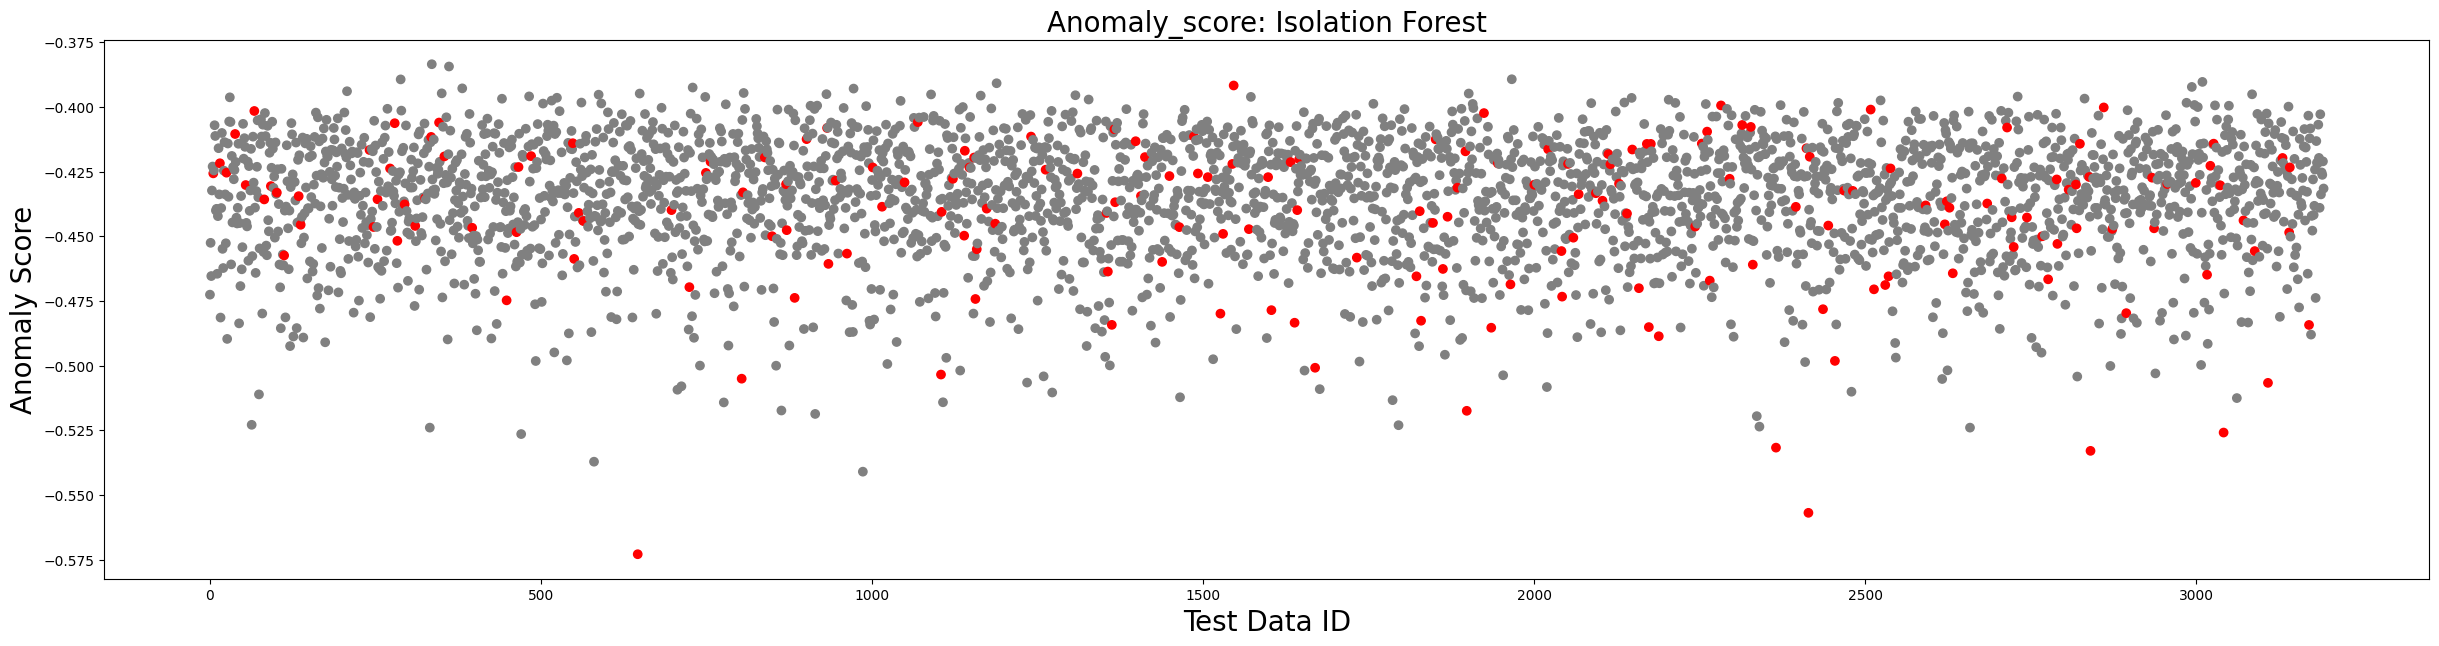

In [27]:
plt.figure(figsize=(30,7))
plt.scatter(np.arange(len(score_iforest)), score_iforest, c = color_svm)
plt.title('Anomaly_score: Isolation Forest', fontsize= 20)
plt.xlabel('Test Data ID', fontsize = 20)
plt.ylabel('Anomaly Score', fontsize = 20)
plt.show()

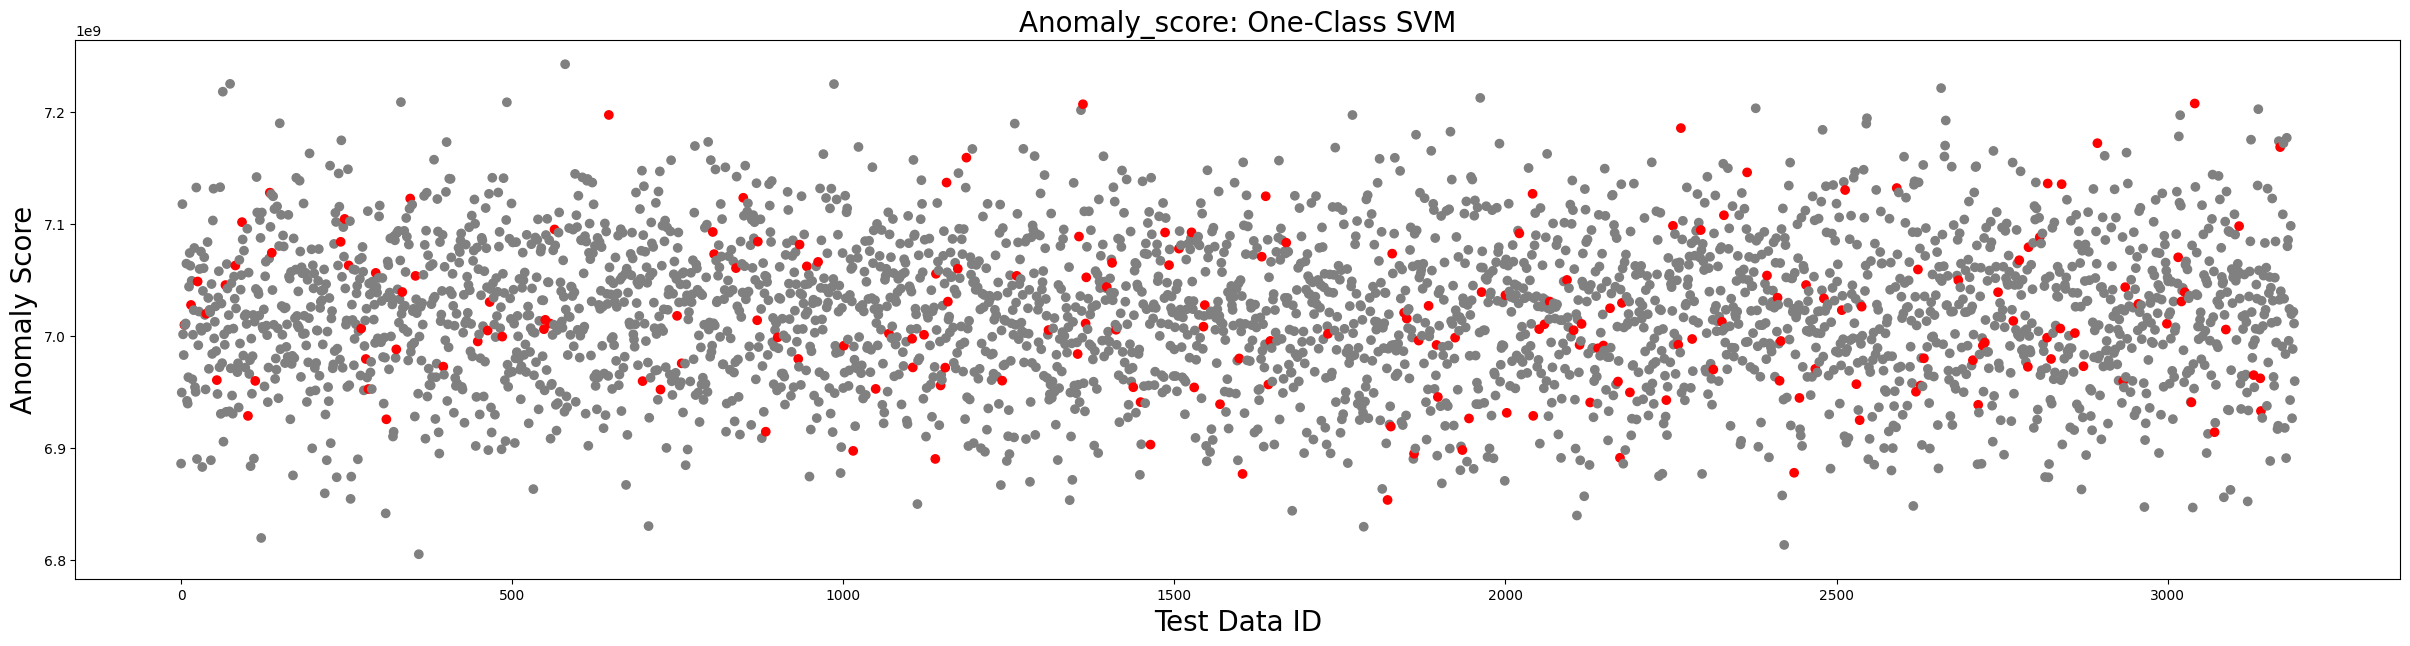

In [28]:
plt.figure(figsize=(30,7))
plt.scatter(np.arange(len(score_svm)), score_svm, c = color_svm)
plt.title('Anomaly_score: One-Class SVM', fontsize= 20)
plt.xlabel('Test Data ID', fontsize = 20)
plt.ylabel('Anomaly Score', fontsize = 20)
plt.show()